ver: 20210922_1743

In [20]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# Returns a n sequence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

# Returns a flipped sequence.
seq_flip = lambda seq, noff: (seq[::-1], seq.size - noff - 1)

# Returns a shifted sequence.
seq_shift = lambda seq, noff, m: (seq, noff - m)

# Align 2 sequences
def seq_align(seq1, noff1, seq2, noff2):
    """Align 2 sequences"""
    n_min = min(-noff1, -noff2)
    n_max = max(seq1.size-noff1-1, seq2.size-noff2-1)
    seq1 = np.pad(seq1, (-noff1-n_min, n_max-(seq1.size-noff1-1)), constant_values=(0,0))
    noff1 = -n_min
    seq2 = np.pad(seq2, (-noff2-n_min, n_max-(seq2.size-noff2-1)), constant_values=(0,0))
    noff2 = -n_min
    return (seq1, noff1, seq2, noff2)

# 1.1.3 序列的卷积和

$$ y(n) = x(n)*h(n) = \sum_{m=-\infty}^{\infty} x(m)h(n-m) $$
设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$, $h(n)=R_3(n)$, 求 $y(n) = x(n)*h(n)$

解：用对位相乘相加法，可得
$$
\begin{array}{r}
     x(n): &    &     &    1 & \underline{0.5}   & 0.25  & 0.125 \\
     h(n): &    &     &      &   \underline{1}   &   1   &     1 \\
    \hline
           &    &     &    1 & 0.5   & 0.25  & 0.125 \\
           &    &   1 &  0.5 & 0.25  & 0.125 \\
           &  1 & 0.5 & 0.25 & 0.125 \\
   \hline
     y(n): & 1  & \underline{1.5} & 1.75 & 0.875 & 0.375 & 0.125
\end{array}
$$

x = [1.    0.5   0.25  0.125] , noff_x = 1
h = [1 1 1] , noff_h = 0


Text(0.5, 0, 'n')

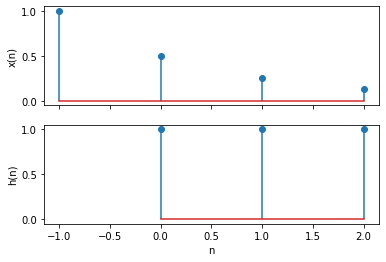

In [21]:
# Define the sequences.

x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
h = np.array([1, 1, 1]); noff_h = 0

print("x =", x, ", noff_x =", noff_x)
print("h =", h, ", noff_h =", noff_h)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(h, noff_h), h)
axs[1].set_ylabel('h(n)')
axs[1].set_xlabel('n')

(1) 翻褶：选哑变量为$m$,作$x(m)$、$h(m)$,将$h(m)$以$m=0$的垂直轴为对称轴翻褶
成$h(-m)$

h_flip = [1 1 1] , noff_h_flip = 2


Text(0.5, 0, 'm')

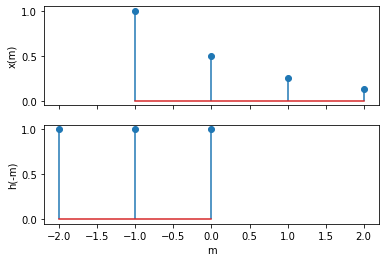

In [22]:
(h_flip, noff_h_flip) = seq_flip(h, noff_h)

print("h_flip =", h_flip, ", noff_h_flip =", noff_h_flip)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(m)')
axs[1].stem(seq_n(h_flip, noff_h_flip), h_flip)
axs[1].set_ylabel('h(-m)')
axs[1].set_xlabel('m')

(2) 移位：将$h(-m)$移位$n$，得$h(n-m)$。$n>0$时，右移$n$位，$n<0$时，左移$|n|$位。

h_flip_shift = [1 1 1] , noff_h_flip_shift = 3


Text(0.5, 0, 'm')

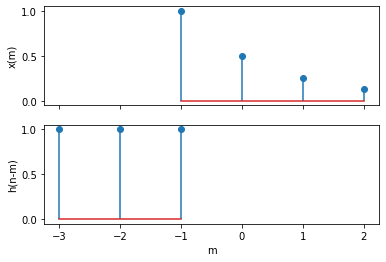

In [23]:
n = -1

(h_flip_shift, noff_h_flip_shift) = seq_shift(h_flip, noff_h_flip, n)

print("h_flip_shift =", h_flip_shift, ", noff_h_flip_shift =", noff_h_flip_shift)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(m)')
axs[1].stem(seq_n(h_flip_shift, noff_h_flip_shift), h_flip_shift)
axs[1].set_ylabel('h(n-m)')
axs[1].set_xlabel('m')

(3) 相乘：将$h(n-m)$与$x(m)$在相同$m$处的对应值相乘。

Text(0.5, 0, 'm')

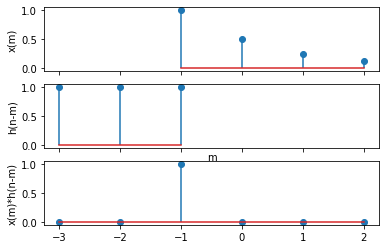

In [24]:
(x1, noff_x1, h1, noff_h1) = seq_align(x, noff_x, h_flip_shift, noff_h_flip_shift)
x_dot_h_flip_shift = x1*h1
noff_x_dot_h_flip_shift = noff_x1

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(m)')
axs[1].stem(seq_n(h_flip_shift, noff_h_flip_shift), h_flip_shift)
axs[1].set_ylabel('h(n-m)')
axs[2].stem(seq_n(x_dot_h_flip_shift, noff_x_dot_h_flip_shift), x_dot_h_flip_shift)
axs[2].set_ylabel('x(m)*h(n-m)')
axs[1].set_xlabel('m')

(4) 相加：将以上所有$m$处的乘积值叠加，就得到这一个$n$值下的$y(n)$值。

In [25]:
y = sum(x_dot_h_flip_shift)
print(y)

1.0


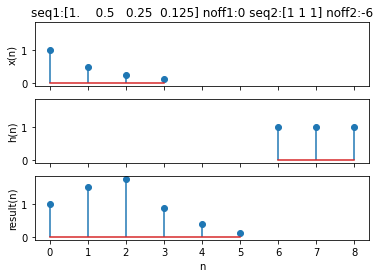

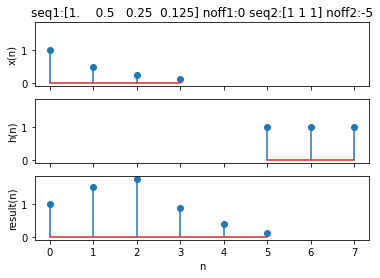

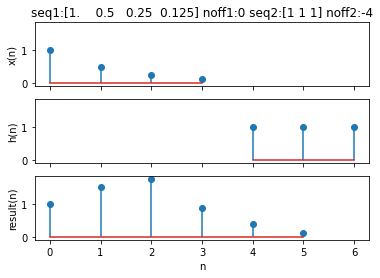

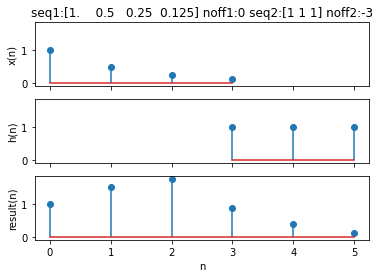

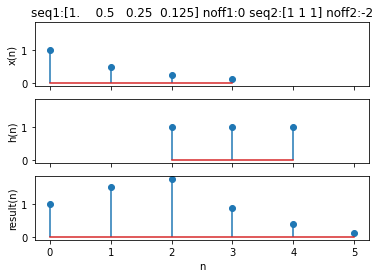

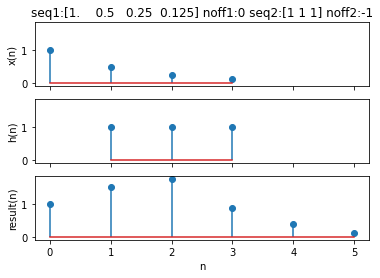

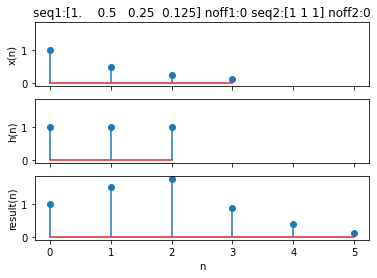

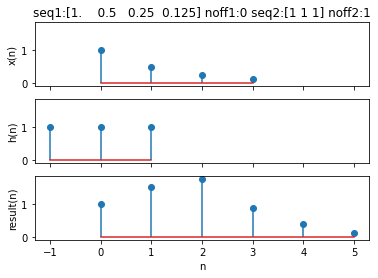

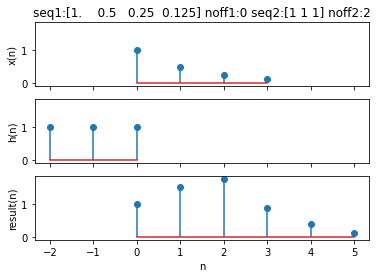

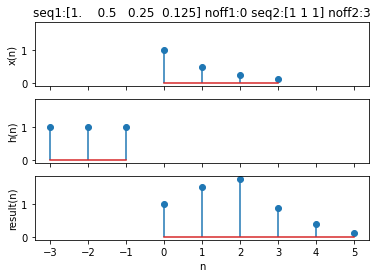

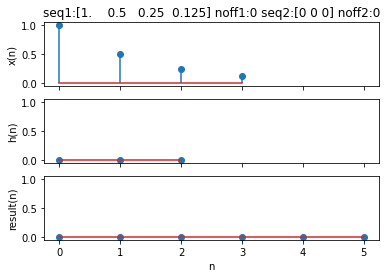

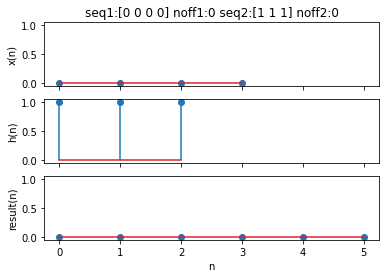

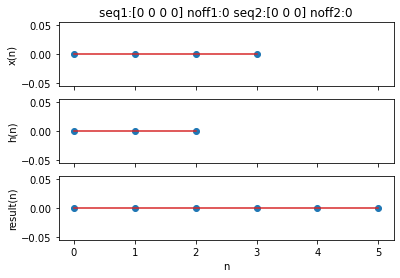

In [49]:
# Build a general function for computing convolution of two sequences.

# The API of the function:
#
#  seq_conv(seq1, noff1, seq2, noff2)
#     Returns the discrete, linear convolution of two sequences.
#
#     Parameters:
#         seq1, seq2: array_like
#             The 2 input sequences.
#         noff1, noff： int
#             n's offsets of the 2 input sequences.
#     Returns: (seq, noff)
#         seq: array_like
#             The output sequence.
#         noff: int
#             n's offset of the output sequence.
#
# [To be completed by students.]
# Note:
# - Requires the function and its unit test.
# - Must base on the code above. DO NOT use any built-in convolution functions!
import unittest


def plotVertical(title, plotData):
    """
        Parameters:
        title: plot title string
        plotData: tuple array, contains data to plot
        [(seq, noff, label), ...]
    """
    # Get the row number
    row = len(plotData)
    # Create a plot, which plots data sequence vertically, shares the same X and Y axis
    _, axe = plt.subplots(row, 1, sharex=True, sharey=True)
    axe[0].set_title(title)
    for i in range(row):
        # Get the arguments
        seq, offset, label = plotData[i]
        # Create a stem plot for seq
        axe[i].stem(seq_n(seq, offset), seq)
        # Set Y label
        axe[i].set_ylabel(label)
    # Set X label at the bottom
    axe[-1].set_xlabel('n')


def seq_conv(seq1, noff1, seq2, noff2):
    """
    Returns the discrete, linear convolution of two sequences.

    Parameters:
        seq1, seq2: array_like
            The 2 input sequences.
        noff1, noff： int
            n's offsets of the 2 input sequences.
    Returns: (seq, noff)
        seq: array_like
            The output sequence.
        noff: int
            n's offset of the output sequence.
    """
    # Flip seq2
    seq2Flipped, noff2Flipped = seq_flip(seq2, noff2)
    # Range of the result sequence, nEnd is exclusive
    (nStart, nEnd) = (-(noff1 + noff2),
                      (seq2.size - noff2 - 1) + (seq1.size - noff1 - 1) + 1)
    # Result sequence length
    resultLen = nEnd - nStart
    resultSeq = np.empty([resultLen])
    # Foreach n to create the result sequence
    for n in range(nStart, nEnd):
        # Shift h(n), which is seq2
        seq2Shifted, noff2Shifted = seq_shift(seq2Flipped, noff2Flipped, n)
        # Align the h(n) and x(n)
        seq1Aligned, _, seq2Aligned, _ = seq_align(
            seq1, noff1, seq2Shifted, noff2Shifted)
        # Multiply two aligned sequence and sum it up
        resultSeq[n - nStart] = (seq1Aligned * seq2Aligned).sum()
    # Return the result sequence and its noff
    return resultSeq, noff1


def testSeq_conv():
    def assertEqual(expected, actual):
        assert expected == actual, f'Expected:{expected} Actual:{actual}'

    def assertAlmostEquals(expected, actual):
        assert ((expected - actual) <
                0.001).all(), f'Expected:{expected} Actual:{actual}'

    def checkSeq(seq1, noff1, seq2, noff2):
        # Convert to np.array
        seq1 = np.array(seq1)
        seq2 = np.array(seq2)
        # Calculate the convolution by seq_conv
        resultSeq_conv, noff = seq_conv(seq1, noff1, seq2, noff2)
        # Check if noff equals the noff1
        assertEqual(noff1, noff)
        # Calculate the convolution by np.convolve
        resultNpConvolve = np.convolve(seq1, seq2)
        # Check if two result sequence is equal
        assertAlmostEquals(resultNpConvolve, resultSeq_conv)
        # Plot the result
        plotVertical(
            f'seq1:{seq1} noff1:{noff1} seq2:{seq2} noff2:{noff2}',
            [
                (seq1, noff1, "x(n)"),
                (seq2, noff2, "h(n)"),
                (resultSeq_conv, noff1, "result(n)"),
            ])

    # Define the sequences.
    x = [1, 1/2, 1/4, 1/8]
    h = [1, 1, 1]

    for noff2 in range(-6, 4):
        checkSeq(x, 0, h, noff2)

    checkSeq(x, 0, [0, 0, 0], 0)
    checkSeq([0, 0, 0, 0], 0, h, 0)
    checkSeq([0, 0, 0, 0], 0, [0, 0, 0], 0)


testSeq_conv()
